In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import networkx as nx
%matplotlib inline

In [5]:
df = pd.read_csv('DSL-StrongPasswordData.csv')
df.head()

,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


In [6]:
subjects = df['subject'].unique()

In [7]:
subjects_to_int = {subject: i  for i, subject in enumerate(subjects)}
int_to_subjects = {i: subject for i, subject in enumerate(subjects)}

In [8]:
df = df.replace(subjects_to_int)

C:\Users\raahu\AppData\Local\Temp\ipykernel_1176\1725018810.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(subjects_to_int)


In [9]:
df.head()

,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,0,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,0,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,0,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,0,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,0,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


In [10]:
data_raw = df.values
print(data_raw)
data_raw.shape

[[ 0.      1.      1.     ...  0.3509  0.2171  0.0742]
 [ 0.      1.      2.     ...  0.2756  0.1917  0.0747]
 [ 0.      1.      3.     ...  0.2847  0.1762  0.0945]
 ...
 [50.      8.     48.     ...  0.2017  0.0983  0.0905]
 [50.      8.     49.     ...  0.1917  0.0938  0.0931]
 [50.      8.     50.     ...  0.1993  0.1186  0.1018]]


(20400, 34)

In [11]:
data=data_raw[ :, 3:-1]
labels_raw = df['subject'].values
labels= labels_raw.reshape(labels_raw.shape[0],1)
data=np.hstack([data, labels])
print(data)

[[1.491e-01 3.979e-01 2.488e-01 ... 3.509e-01 2.171e-01 0.000e+00]
 [1.111e-01 3.451e-01 2.340e-01 ... 2.756e-01 1.917e-01 0.000e+00]
 [1.328e-01 2.072e-01 7.440e-02 ... 2.847e-01 1.762e-01 0.000e+00]
 ...
 [9.390e-02 1.189e-01 2.500e-02 ... 2.017e-01 9.830e-02 5.000e+01]
 [9.230e-02 1.294e-01 3.710e-02 ... 1.917e-01 9.380e-02 5.000e+01]
 [5.960e-02 1.310e-01 7.140e-02 ... 1.993e-01 1.186e-01 5.000e+01]]


In [12]:
np.random.shuffle(data)
x=data[ : , :-1]
y=data[:,-1]
x.shape

(20400, 30)

In [13]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

In [15]:
Y_train = to_categorical(y_train, num_classes=51)
Y_test=to_categorical(y_test,num_classes=51)


In [16]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape

(18360, 30, 1)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [18]:
# rnn = Sequential()
# rnn.add(LSTM(units = 45, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# rnn.add(Dropout(0.2))
# for i in [True, True, False]:
#     rnn.add(LSTM(units = 45, return_sequences = i))
#     rnn.add(Dropout(0.2))
# rnn.add(Dense(units = 51, activation='softmax', name='output_layer'))

In [19]:
rnn = Sequential()
for i in [True, True, False]:
    rnn.add(LSTM(units = 45, return_sequences = i))
    rnn.add(Dropout(0.2))
rnn.add(Dense(units = 51, activation='softmax'))

In [20]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.1)
opt = Adam(learning_rate=lr_schedule, beta_1=0.9, beta_2=0.999)

In [21]:
rnn.compile(optimizer = opt, loss = 'categorical_crossentropy')

Epoch 1/60
574/574 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - loss: 3.5719 - val_loss: 2.3300
Epoch 2/60
574/574 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - loss: 2.0948 - val_loss: 1.4699
Epoch 3/60
574/574 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - loss: 1.5352 - val_loss: 1.2751
Epoch 4/60
574/574 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - loss: 1.2715 - val_loss: 1.0423
Epoch 5/60
574/574 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - loss: 1.1029 - val_loss: 0.9389
Epoch 6/60
574/574 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - loss: 0.9724 - val_loss: 0.7804
Epoch 7/60
574/574 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - loss: 0.8523 - val_loss: 0.7405
Epoch 8/60
574/574 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - loss: 0.7901 - val_loss: 0.6852
Epoch 9/60
574/574 ━━━━━━━━━━━━━━━━━━━━ 24s 42ms/step - loss: 0.6955 - val_loss: 0.6331
Epoch 10/60
574/574 ━━━━━━━━━━━━━━━━━━━━ 24s 42ms/step - loss: 0.6433 - val_loss: 0.5605
Epoch 11/60
574/574 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - loss: 0.5972 - val_loss: 0.5235
Epoch 12/60
574/574 ━━━━━━━━━━

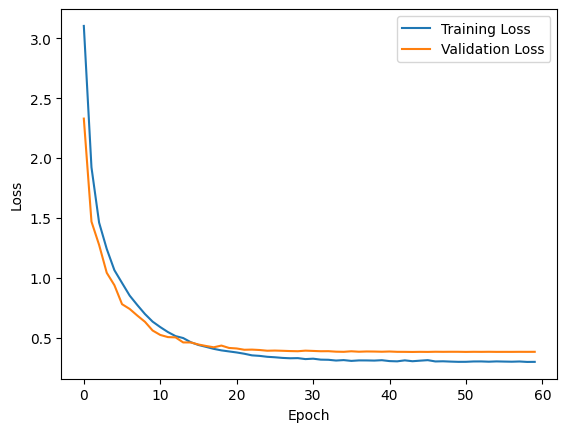

In [25]:
history= rnn.fit(X_train, Y_train,validation_data=(X_test, Y_test), epochs = 60, batch_size=32)

# Plot the training loss and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
# rnn.save_weights('rnn_weights.h5')

ValueError: The filename must end in `.weights.h5`. Received: filepath=rnn_weights.h5

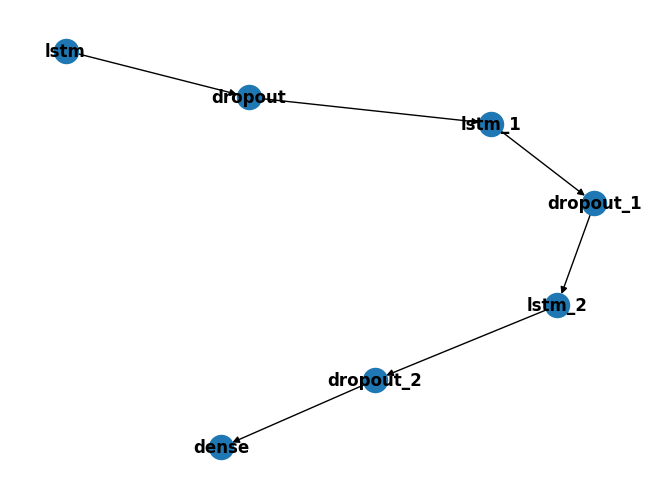

In [26]:
G = nx.DiGraph()  # Create a directed graph

for layer in rnn.layers:
    G.add_node(layer.name)

# Add edges (connections)
for i in range(len(rnn.layers) - 1):
    G.add_edge(rnn.layers[i].name, rnn.layers[i + 1].name)

# Customize layout and display
pos = nx.spring_layout(G)  # Choose a layout algorithm
nx.draw(G, pos, with_labels=True, font_weight="bold")
plt.show()


In [23]:
print(X_test.shape)
predictions_prob= rnn.predict(X_test)
y_pred=[np.argmax(i) for i in predictions_prob]
print(y_pred)
print(y_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

(2040, 30, 1)


64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step
[11, 11, 11, 34, 34, 11, 11, 34, 34, 34, 11, 34, 34, 11, 11, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 11, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 11, 34, 34, 34, 11, 11, 34, 34, 34, 11, 34, 34, 34, 34, 34, 11, 11, 34, 34, 34, 11, 11, 34, 11, 34, 34, 11, 11, 34, 34, 11, 11, 34, 34, 11, 34, 34, 11, 34, 11, 34, 34, 34, 11, 34, 34, 34, 34, 34, 11, 34, 11, 11, 34, 34, 34, 34, 34, 11, 34, 11, 34, 34, 34, 11, 11, 11, 11, 34, 34, 11, 34, 34, 34, 11, 34, 11, 34, 34, 34, 34, 34, 11, 11, 34, 34, 11, 11, 34, 34, 34, 11, 34, 34, 34, 11, 11, 34, 11, 34, 11, 34, 11, 34, 34, 34, 34, 34, 11, 11, 11, 34, 34, 34, 34, 34, 34, 11, 11, 34, 34, 34, 11, 11, 34, 34, 11, 34, 11, 34, 34, 11, 34, 34, 11, 34, 34, 11, 34, 34, 11, 11, 11, 34, 11, 34, 34, 11, 34, 34, 11, 11, 11, 34, 34, 11, 34, 11, 11, 34, 11, 11, 11, 34, 34, 34, 34, 34, 11, 34, 34, 11, 34, 34, 34, 11, 11, 11, 11, 11, 34, 34, 11, 34, 11, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 11,

In [24]:
# rnn.save('LSTM.keras') 